In [3]:
%matplotlib inline

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

import pandas as pd
from Utils import *

from algorithms import *
from new_utils import *

# Comparison of algorithms for ordinal embedding

In [86]:
#Create data
dimensions= 15
number_of_points= 200

X = np.random.random((number_of_points, dimensions))
X = center_data(X)

In [87]:
n,d = X.shape
pulls = 1000
triplets, error = getTriplets(X, pulls)
    
# print(ste_loss(X, triplets,1))

# Algorithms

In [6]:
# from projected_gradient import *

# M, loss, proj_grad_loss_arr = computeEmbedding(M0,
#                 n,
#                  d,
#                  triplets,
#                  num_random_restarts=0,
#                  max_iter_GD=500,
#                  max_norm=1,
#                  epsilon=0.0001,
#                  accuracy=accuracy, 
#                  verbose=False)



In [7]:
# from crowd_kernel import *

In [8]:
# X, emp_loss_train, projection_free_loss_arr = computeEmbedding(n,d,triplets,alpha=1,
#                                     num_random_restarts=0,
#                                     epsilon=0.0001,
#                                     accuracy = accuracy,
#                                     max_iters=100,
#                                     verbose=False)


In [88]:
stats_non_convex = []

for epsilon in np.linspace(0.005, 0.1,5):
    print('Epsilon', epsilon)
    X0 = np.random.random((n,d))
    stats1= triplet_algorithms(ste_loss, 
                       triplets,
                       X0,                       
                       d,
                       'full_grad', 
                       10,
                       iters=100,
                       epsilon = epsilon,
                       proj=None,
                       debug=False)
    
    stats_non_convex.append(stats1)
    print()

Epsilon 0.005
0.493
Accuracy reached in 31 iterations

Epsilon 0.02875
0.49
Accuracy reached in 17 iterations

Epsilon 0.0525
0.492
Accuracy reached in 13 iterations

Epsilon 0.07625
0.497
Accuracy reached in 12 iterations

Epsilon 0.1
0.491
Accuracy reached in 9 iterations



In [25]:
# X0 = np.random.random((n,d))
# # X0 = X
# stats4= triplet_algorithms(ste_loss, 
#                            triplets,
#                            X0,                       
#                            d,
#                            'sgd', 
#                            0.1,
#                            iters=5000,
#                            epsilon = 0.01,
#                            proj=None,
#                            debug=False
#                           )

In [30]:
M0 = np.random.randn(n,n)
# M0 = (M+M.transpose())/2
# M0 = M - 1.0/n*dot(ones((n,n)),M)
# print(M0)



In [52]:
stats_convex = []
for epsilon in np.linspace(0.005, 0.1,5):
    stats2 = triplet_algorithms(ste_loss_convex, 
                       triplets,
                       M0,                       
                       d,                            
                       'full_grad', 
                        500,
                       iters=5000,
                       epsilon =epsilon,
                       proj=projected,
                       debug= False)
    
    stats_convex.append(stats2)

0.5065
Accuracy reached in 100 iterations
0.5065
Accuracy reached in 62 iterations
0.5065
Accuracy reached in 48 iterations
0.5065
Accuracy reached in 40 iterations
0.5065
Accuracy reached in 34 iterations


In [13]:
# stats3 = triplet_algorithms(ste_loss_convex, 
#                             triplets,
#                             M0,                       
#                             d,                            
#                             'sgd', 
#                             3,
#                             iters=5000,
#                             epsilon = 0.01,
#                             proj=projected)

0.507
No progress


In [ ]:
# stats2['emp']

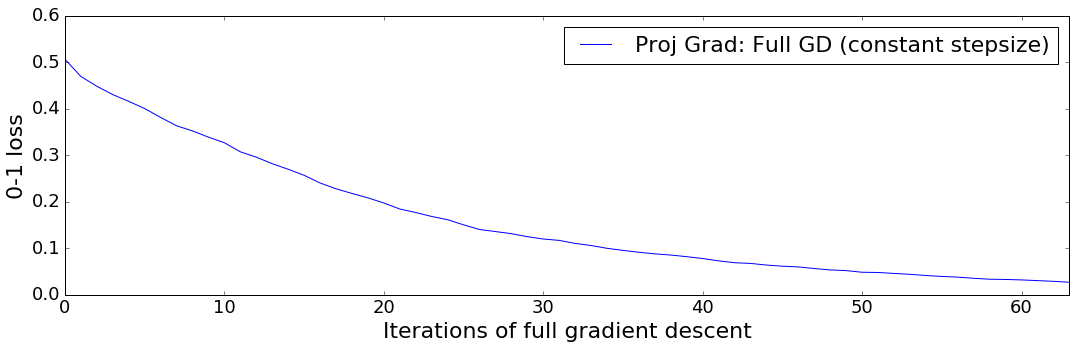

In [85]:
df = pd.DataFrame([stats_convex[1]['emp'],
#                    stats_non_convex[1]['emp'],
#                    stats3['emp'],
#                    stats4['emp'],                   
                  ]).T
df.columns = ['Proj Grad: Full GD (constant stepsize)',
#               'Non convex full gradient descent (constant stepsize)', 
#               'Proj Grad: SGD (constant stepsize)',
#               'Non Convex: SGD (constant stepsize)',              
             ]

ax = df.plot(figsize=(18,5), fontsize=18)
ax.set_ylabel('0-1 loss', fontsize=22)
ax.set_xlabel('Iterations of full gradient descent', fontsize=22)
ax.legend(fontsize=22);

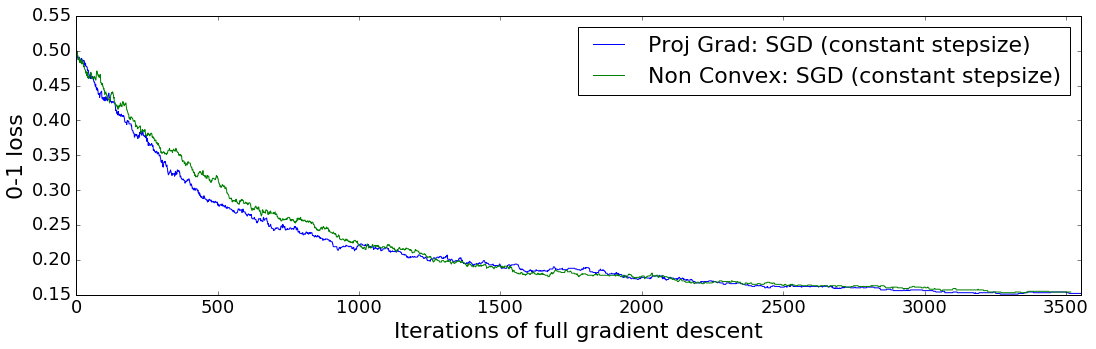

In [21]:
df = pd.DataFrame([
#                 stats2['emp'],
#                 stats1['emp'],
                   stats3['emp'],
                   stats4['emp'],                   
                  ]
                 ).T
df.columns = [
#     'Proj Grad: Full GD (constant stepsize)',
#               'Non convex full gradient descent (constant stepsize)', 
              'Proj Grad: SGD (constant stepsize)',
              'Non Convex: SGD (constant stepsize)',              
             ]

ax = df.plot(figsize=(18,5), fontsize=18)
ax.set_ylabel('0-1 loss', fontsize=22)
ax.set_xlabel('Iterations of full gradient descent', fontsize=22)
ax.legend(fontsize=22);

In [43]:
sum(stats1['time_per_iter'])

7.238949775695801

In [42]:
sum(stats2['time_per_iter'])

169.49984312057495

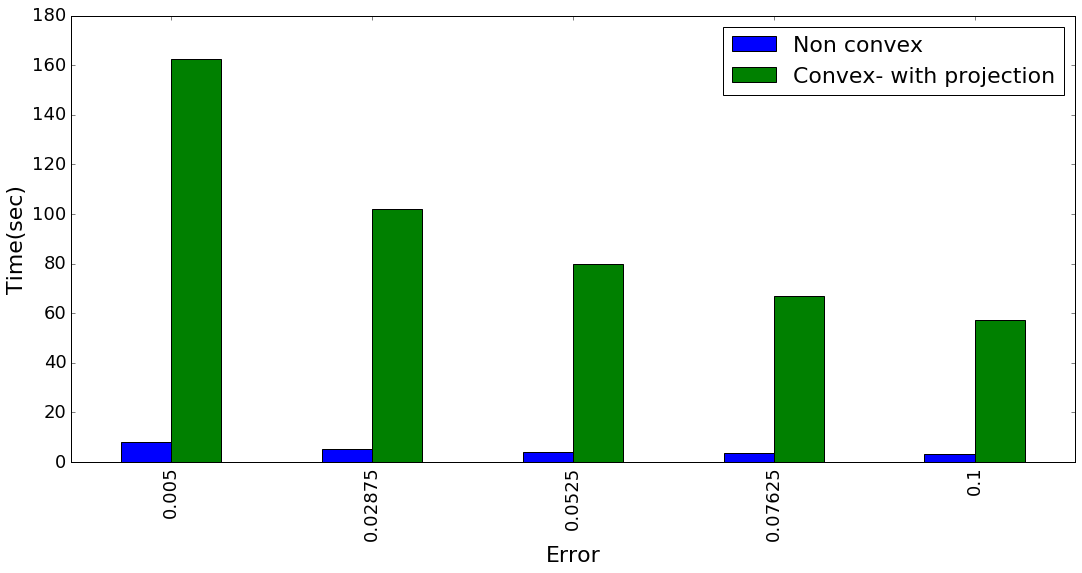

In [79]:
df = []
for i,j in zip(stats_non_convex,stats_convex):
    df.append([sum(i['time_per_iter']), len(j['emp'])*stats_convex[0]['avg_time_per_iter']])
    
df = pd.DataFrame(df, columns=['Non convex', 'Convex- with projection'], index=np.linspace(0.005, 0.1,5))
ax = df.plot(figsize=(18,8), fontsize=18, kind='bar')
ax.set_ylabel('Time(sec)', fontsize=22)
ax.set_xlabel('Error', fontsize=22)
ax.legend(fontsize=22, loc='upper right');    

In [80]:
# for i in range(5):
#     print(len(stats_convex[i]['emp']))
#     print(stats_convex[i]['time_per_iter'])
#     print()